In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex
import seaborn as sns

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df_starbucks = pd.read_csv('directory.csv')
df_starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df_starbucks = df_starbucks[(df_starbucks['Brand'] == 'Starbucks')]
df_starbucks = df_starbucks[df_starbucks['Country'] == 'US'].reset_index(drop=True)
df_starbucks.shape

(13311, 13)

In [5]:
df_cityre = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df_cityre.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [6]:
df_city50 = df_cityre[0:50]
df_city50.shape

(50, 301)

In [7]:
top50_rev = df_city50[['RegionName', 'StateName', '2017-01-31']]
top50_rev = top50_rev.rename(columns={"RegionName": "City", "StateName": "State", "2017-01-31": "RE_Value"})
top50_rev.head()

,City,State,RE_Value
0,New York,NY,584490.0
1,Los Angeles,CA,636974.0
2,Houston,TX,170083.0
3,Chicago,IL,233162.0
4,San Antonio,TX,161663.0


In [9]:
mask = list(df_city50['RegionName'])
top50_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
top50_star_count = top50_star['City'].value_counts().rename_axis('City').reset_index(name = 'NumStarbucks')
top50_star_count.head()

,City,NumStarbucks
0,New York,230
1,Chicago,179
2,Las Vegas,153
3,Seattle,151
4,Houston,151


In [10]:
rev_star = top50_star_count.merge(top50_rev, left_on = 'City', right_on = 'City')
#.drop('RegionName', inplace = True, axis = 1)
rev_star.head()

,City,NumStarbucks,State,RE_Value
0,New York,230,NY,584490.0
1,Chicago,179,IL,233162.0
2,Las Vegas,153,NV,217354.0
3,Seattle,151,WA,637004.0
4,Houston,151,TX,170083.0


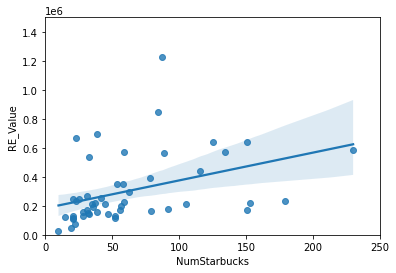

In [31]:
h = sns.regplot(data = rev_star, x = 'NumStarbucks', y = 'RE_Value')
h.set(xlim = (0, 250), ylim = (0, 1500000))
plt.show()

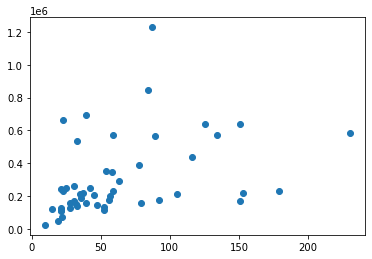

In [11]:
x, y = rev_star['NumStarbucks'], rev_star['RE_Value']

plt.clf()
plt.scatter(x, y)
plt.show()

In [12]:
#!conda install xlrd
#pop_df = pd.read_excel('SUB-IP-EST2019-ANNRES.xlsx')
#pop_df.head()

df_population = pd.read_csv('sub-est2019_all.csv', encoding = 'cp1252')
df_population.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


In [13]:
df_cities = df_population[(df_population['SUMLEV']== 162)]
df_cities_200 = df_cities.sort_values('POPESTIMATE2017', ascending = False)[0:200]
df_cities_200.shape

(200, 22)

In [21]:
df_cities_features = df_cities_200[['NAME', 'POPESTIMATE2017', 'STNAME']]
df_cities_features['City'] = df_cities_features['NAME'].str.split(pat = ' town$| city$').str[0]
df_cities_features = df_cities_features.drop(['NAME'], axis = 1)
df_cities_features = df_cities_features.rename(columns = {'POPESTIMATE2017': '2017_Population', 'STNAME':'State'})
df_cities_features.head()

C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2017_Population,State,City
46586,8437478,New York,New York
3092,3975788,California,Los Angeles
8173,2711069,Illinois,Chicago
71676,2316750,Texas,Houston
1512,1633560,Arizona,Phoenix


In [22]:
df_cities_features['State'].replace(us_state_abbrev, inplace = True)
#mask_state = list(df_city50['StateName'])
 
df_select_cities = df_cities_features[df_cities_features['City'].str.lower().isin([x.lower() for x in mask])]
df_select_cities = df_select_cities.reset_index(drop = True)
df_select_cities.head()

,2017_Population,State,City
0,8437478,NY,New York
1,3975788,CA,Los Angeles
2,2711069,IL,Chicago
3,2316750,TX,Houston
4,1633560,AZ,Phoenix


In [23]:
#for the few that aren't correct, lookup actual data (should only be 4 cities)
#add data
#standardize for per capita population
#graph it
#start writing report i guess


In [24]:
final_df = rev_star.merge(df_select_cities, left_on = 'City', right_on = 'City')
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y
0,New York,230,NY,584490.0,8437478,NY
1,Chicago,179,IL,233162.0,2711069,IL
2,Las Vegas,153,NV,217354.0,635262,NV
3,Seattle,151,WA,637004.0,728661,WA
4,Houston,151,TX,170083.0,2316750,TX


In [25]:
final_df = final_df[final_df['State_x'] == final_df['State_y']]
final_df['Starbucks_percap'] = final_df['NumStarbucks'] / final_df['2017_Population']
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y,Starbucks_percap
0,New York,230,NY,584490.0,8437478,NY,0.000027
1,Chicago,179,IL,233162.0,2711069,IL,0.000066
2,Las Vegas,153,NV,217354.0,635262,NV,0.000241
3,Seattle,151,WA,637004.0,728661,WA,0.000207
4,Houston,151,TX,170083.0,2316750,TX,0.000065


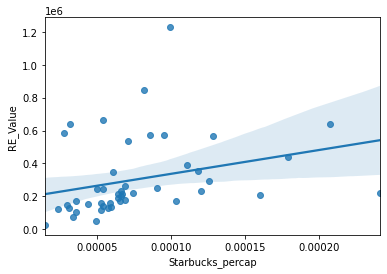

In [27]:
g = sns.regplot(x = 'Starbucks_percap', y = 'RE_Value', data = final_df)
plt.show()

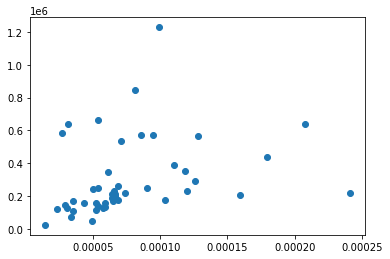

In [26]:
x, y = final_df['Starbucks_percap'], final_df['RE_Value']

plt.clf()
plt.scatter(x, y)

plt.show()